In [1]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import ma
from pathlib import Path
import preprocessor 
from importlib import reload
reload(preprocessor)

<module 'preprocessor' from 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\preprocessor.py'>

In [2]:
prep = preprocessor.Preprocessor()

In [6]:
path = Path(r'C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\.data\combined_fred_data.csv')
data = pd.read_csv(path, index_col=0)

In [7]:
data.index = pd.to_datetime(data.index)

In [21]:
arr = prep.kalman_impute(data["initial_claims"])

In [24]:
arr.values[-20:].astype(int)

array([852284, 853160, 841000, 841367, 841666, 841948, 842215, 842466,
       842701, 730000, 725882, 721189, 716384, 711468, 706441, 701302,
       696051, 690689, 685216, 679631])

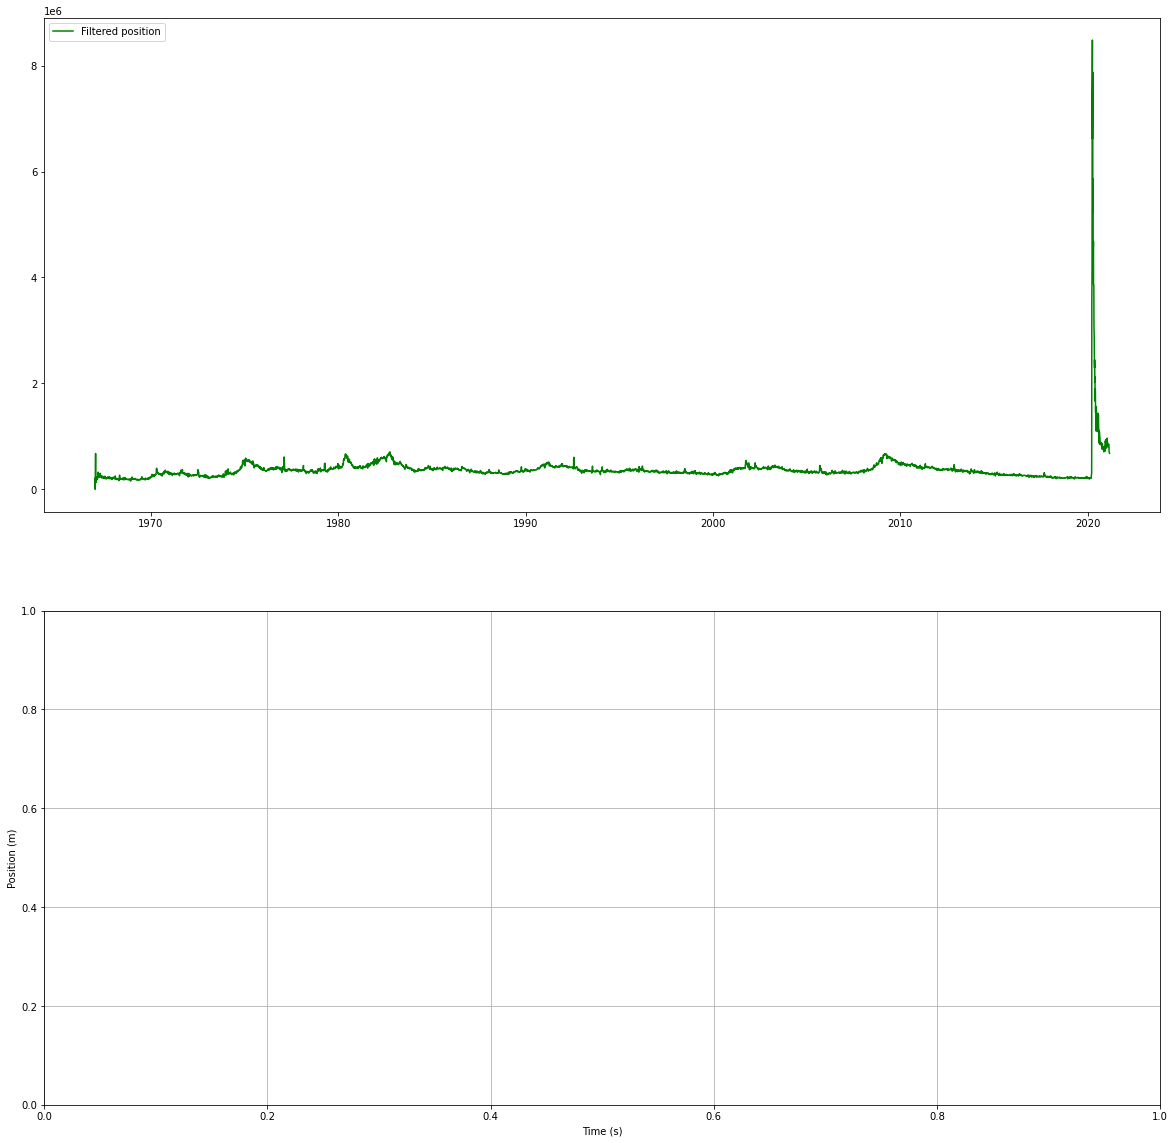

In [27]:
# plot of the resulted trajectory        
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,20))
#axes[0].plot(Time, X.data, "k-", label="Actual", markersize=20)
ax1.plot(arr.index, arr.values, "g-", label="Filtered position", markersize=1)
# ax2.plot(Time, filtered_state_means[:, 0] + position_sigma, "r--", label="+ sigma", markersize=1)
# ax2.plot(Time, filtered_state_means[:, 0] - position_sigma, "r--", label="- sigma", markersize=1)
plt.grid()
ax1.legend(loc="upper left")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.show()   